In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import seaborn as sns

#### Data Loading and Inspection

In [ ]:
attack = pd.read_csv("C:\\Users\\amaan\\Desktop\\UCL Data\\attacking.csv")
attempts = pd.read_csv("C:\\Users\\amaan\\Desktop\\UCL Data\\attempts.csv")
defending = pd.read_csv("C:\\Users\\amaan\\Desktop\\UCL Data\\defending.csv")
discp = pd.read_csv("C:\\Users\\amaan\\Desktop\\UCL Data\\disciplinary.csv")
gk = pd.read_csv("C:\\Users\\amaan\\Desktop\\UCL Data\\goalkeeping.csv")
goals = pd.read_csv("C:\\Users\\amaan\\Desktop\\UCL Data\\goals.csv")
stats = pd.read_csv("C:\\Users\\amaan\\Desktop\\UCL Data\\key_stats.csv")

In [ ]:
attack.head()

In [ ]:
attempts.head()

In [5]:
gk.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6


In [6]:
defending.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


In [7]:
goals.head()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6


In [8]:
stats.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4


In [9]:
attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   serial        176 non-null    int64 
 1   player_name   176 non-null    object
 2   club          176 non-null    object
 3   position      176 non-null    object
 4   assists       176 non-null    int64 
 5   corner_taken  176 non-null    int64 
 6   offsides      176 non-null    int64 
 7   dribbles      176 non-null    int64 
 8   match_played  176 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.5+ KB


In [10]:
defending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   serial               627 non-null    int64 
 1   player_name          627 non-null    object
 2   club                 627 non-null    object
 3   position             627 non-null    object
 4   balls_recoverd       627 non-null    int64 
 5   tackles              627 non-null    int64 
 6   t_won                627 non-null    int64 
 7   t_lost               627 non-null    int64 
 8   clearance_attempted  627 non-null    int64 
 9   match_played         627 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 49.1+ KB


In [11]:
gk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   serial           53 non-null     int64 
 1   player_name      53 non-null     object
 2   club             53 non-null     object
 3   position         53 non-null     object
 4   saved            53 non-null     int64 
 5   conceded         53 non-null     int64 
 6   saved_penalties  53 non-null     int64 
 7   cleansheets      53 non-null     int64 
 8   punches made     53 non-null     int64 
 9   match_played     53 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 4.3+ KB


In [12]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_name       747 non-null    object
 1   club              747 non-null    object
 2   position          747 non-null    object
 3   minutes_played    747 non-null    int64 
 4   match_played      747 non-null    int64 
 5   goals             747 non-null    int64 
 6   assists           747 non-null    int64 
 7   distance_covered  747 non-null    object
dtypes: int64(4), object(4)
memory usage: 46.8+ KB


In [13]:
goals.describe()

,serial,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,55.016393,2.021858,0.972678,0.693989,0.327869,0.021858,1.814208,0.207650,0.196721,6.841530
std,24.173929,2.005367,1.400281,1.140810,0.612722,0.146621,1.923943,0.514137,0.549315,2.568196
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,43.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000
50%,73.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000
75%,73.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,8.000000
max,73.000000,15.000000,11.000000,8.000000,3.000000,1.000000,13.000000,3.000000,3.000000,13.000000


In [14]:
attack.isna()

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
171,False,False,False,False,False,False,False,False,False
172,False,False,False,False,False,False,False,False,False
173,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False


In [15]:
stats.isna()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
742,False,False,False,False,False,False,False,False
743,False,False,False,False,False,False,False,False
744,False,False,False,False,False,False,False,False
745,False,False,False,False,False,False,False,False


In [16]:
defending.isna()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
622,False,False,False,False,False,False,False,False,False,False
623,False,False,False,False,False,False,False,False,False,False
624,False,False,False,False,False,False,False,False,False,False
625,False,False,False,False,False,False,False,False,False,False


In [17]:
goals.isna()

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,False,False,False,False,False,False,False,False,False,False,False,False,False
179,False,False,False,False,False,False,False,False,False,False,False,False,False
180,False,False,False,False,False,False,False,False,False,False,False,False,False
181,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
gk.isna()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


### Forwards Stats and Visualisation

In [19]:
stats['output'] = (stats['goals'] + stats['assists'])/stats['match_played']
stats.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,output
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0.000000
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,0.769231
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1.333333
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,0.307692
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0.000000


In [20]:
stats['position'].unique()

array(['Goalkeeper', 'Forward', 'Midfielder', 'Defender'], dtype=object)

In [21]:
forwards_df = stats[(stats['goals'] > 0) & (stats['position'] == 'Forward')]
forwards_df.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,output
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,0.769231
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1.333333
12,Rodrygo,Real Madrid,Forward,505,11,5,2,65.7,0.636364
15,Asensio,Real Madrid,Forward,207,8,1,2,28.4,0.375000
26,Salah,Liverpool,Forward,1008,13,8,2,112.0,0.769231


#### Attacking Output 

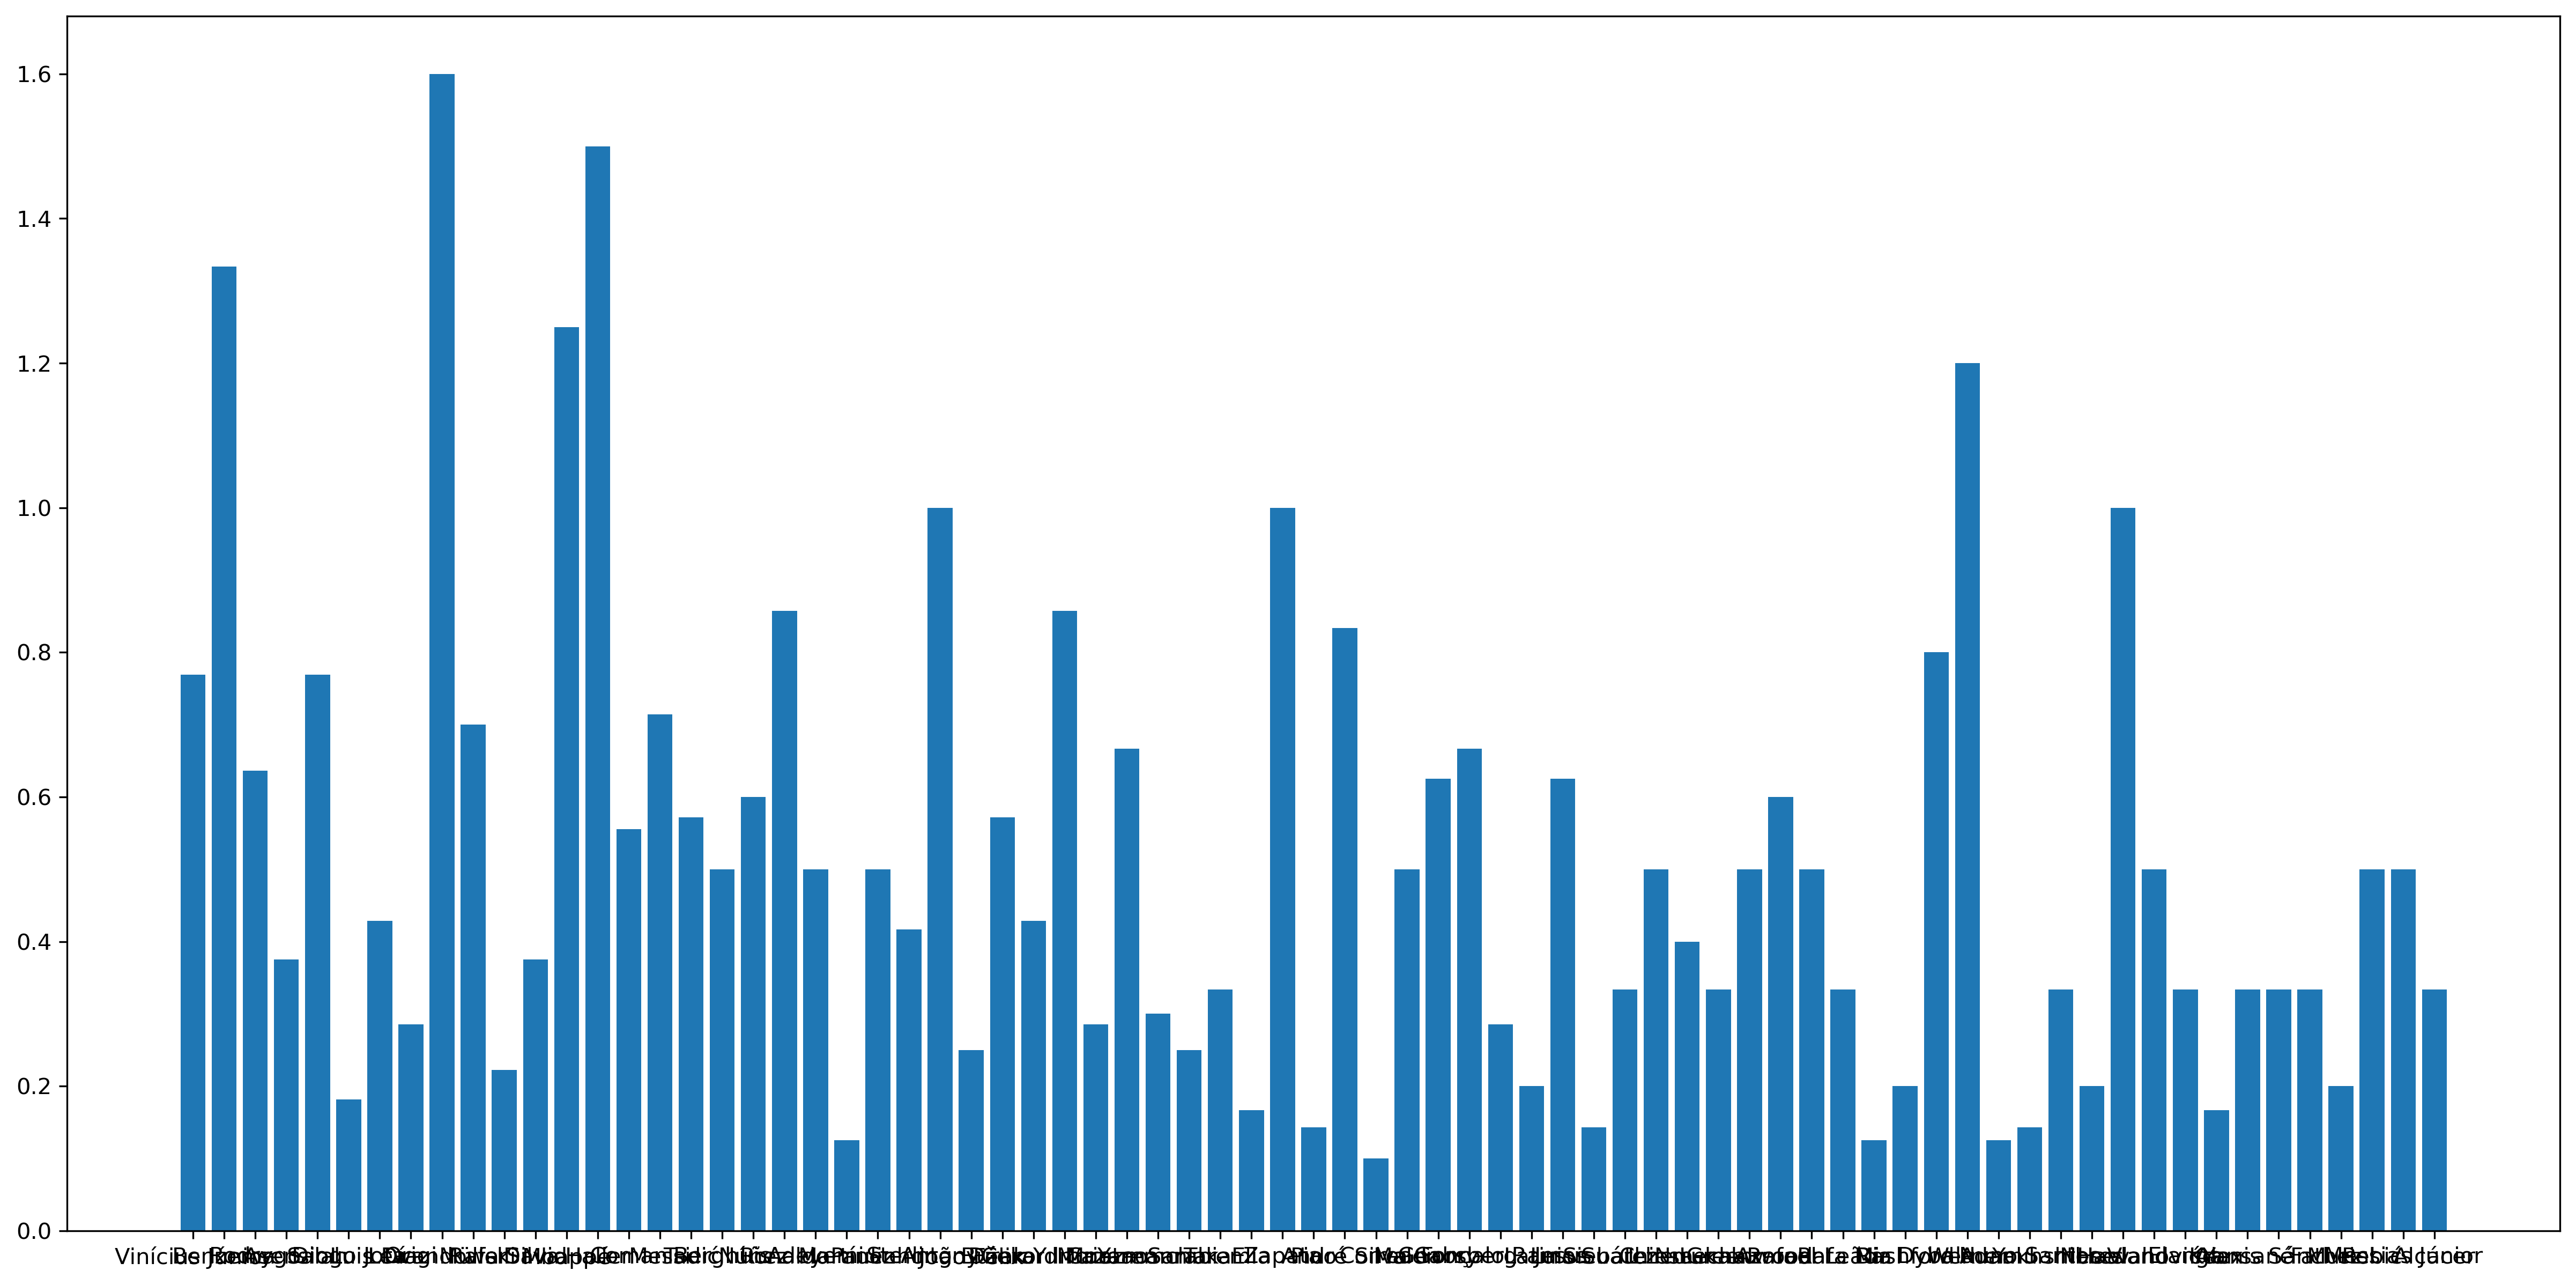

In [22]:
plt.figure(figsize = (20,10), dpi = 300)
plt.bar(forwards_df['player_name'], forwards_df['output'])
plt.show()
#We see that Robert Lewandowski and Karim Benzema were the two most effective forwrads in terms of attacking output per match.

In [23]:
forwards_df.sort_values( by = ['output'], ascending = False)
top10fwds = forwards_df.head(10)
top10fwds

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,output
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,0.769231
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1.333333
12,Rodrygo,Real Madrid,Forward,505,11,5,2,65.7,0.636364
15,Asensio,Real Madrid,Forward,207,8,1,2,28.4,0.375000
26,Salah,Liverpool,Forward,1008,13,8,2,112.0,0.769231
36,Diogo Jota,Liverpool,Forward,578,11,1,1,73.9,0.181818
38,Luis Díaz,Liverpool,Forward,385,7,2,1,49.9,0.428571
45,Origi,Liverpool,Forward,187,7,1,1,23.8,0.285714
66,Lewandowski,Bayern,Forward,876,10,13,3,99.7,1.600000
78,Müller,Bayern,Forward,778,10,4,3,98.5,0.700000


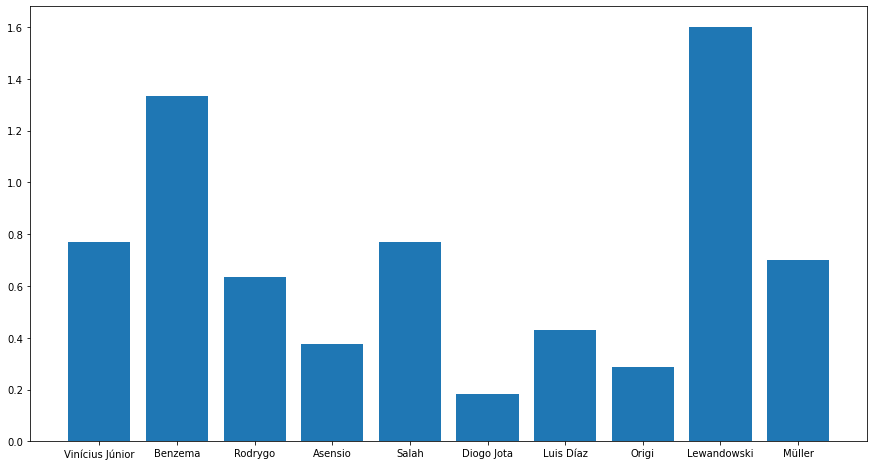

In [24]:
plt.figure(figsize = (15,8))
plt.bar(top10fwds['player_name'], top10fwds['output'])
plt.show()

In [25]:
stats.head()

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,output
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2,0.000000
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,0.769231
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1.333333
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5,0.307692
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4,0.000000


In [26]:
top10fwds.sort_values(by = ['output'], ascending = False)

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,output
66,Lewandowski,Bayern,Forward,876,10,13,3,99.7,1.600000
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5,1.333333
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0,0.769231
26,Salah,Liverpool,Forward,1008,13,8,2,112.0,0.769231
78,Müller,Bayern,Forward,778,10,4,3,98.5,0.700000
12,Rodrygo,Real Madrid,Forward,505,11,5,2,65.7,0.636364
38,Luis Díaz,Liverpool,Forward,385,7,2,1,49.9,0.428571
15,Asensio,Real Madrid,Forward,207,8,1,2,28.4,0.375000
45,Origi,Liverpool,Forward,187,7,1,1,23.8,0.285714
36,Diogo Jota,Liverpool,Forward,578,11,1,1,73.9,0.181818


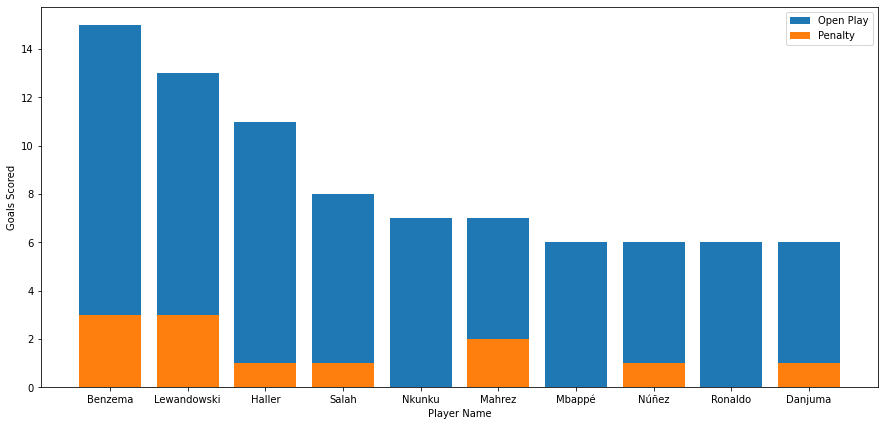

In [27]:
#Plotting top goalscorers in the duration of the UCL
top10goals = goals.head(10)
plt.figure(figsize = (15,7))
plt.bar(top10goals['player_name'], top10goals['goals'])
plt.bar(top10goals['player_name'], top10goals['penalties'])
plt.xlabel("Player Name")
plt.ylabel("Goals Scored")
plt.legend(['Open Play','Penalty'])
plt.show()

Text(0.5, 1.0, "Pie-Chart Showing Karim Benzema's goal-scoring technique")

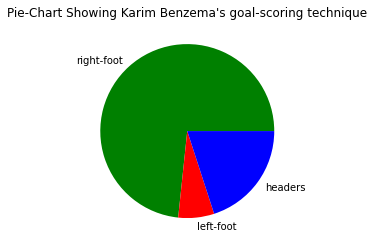

In [28]:
## Pie Chart showing how the top player- Karim Benzema scored his goals.
top10goals.head()
benz = [11,1,3]
labels = ['right-foot','left-foot','headers']
colors = ['green','red','blue']
plt.pie(benz, labels = labels, colors = colors)
plt.title("Pie-Chart Showing Karim Benzema's goal-scoring technique")

#### Midfielders

In [29]:
dist = pd.read_csv("C:\\Users\\amaan\\Desktop\\UCL Data\\distributon.csv")
dist.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8


In [30]:
midfielders_df = dist[dist['position'] == 'Midfielder'].sort_values('pass_accuracy', ascending=False)
midfielders_df.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8
10,11,Maycon,Shakhtar Donetsk,Midfielder,94.5,395,373,58,12,7,9,6
11,11,Nianzou,Bayern,Midfielder,94.5,199,192,0,0,0,5,4
12,13,Marcos Antônio,Shakhtar Donetsk,Midfielder,94.4,234,224,0,0,0,5,5


In [31]:
pass_threshold = midfielders_df.pass_attempted.mean()
print('Pass threshold:', pass_threshold)

Pass threshold: 204.91189427312776


In [32]:
midfielders_df = midfielders_df[midfielders_df['pass_attempted'] > pass_threshold].sort_values('pass_accuracy')
midfielders_df.head()

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
535,536,Seiwald,Salzburg,Midfielder,69.0,258,190,20,25,5,9,8
460,461,De Paul,Atlético,Midfielder,75.8,293,228,29,17,5,19,9
455,456,Aaronson,Salzburg,Midfielder,76.1,239,181,27,18,5,4,8
445,446,Ziyech,Chelsea,Midfielder,76.8,240,186,26,41,11,3,9
424,425,Bruno Fernandes,Man. United,Midfielder,78.2,324,250,21,28,6,11,7


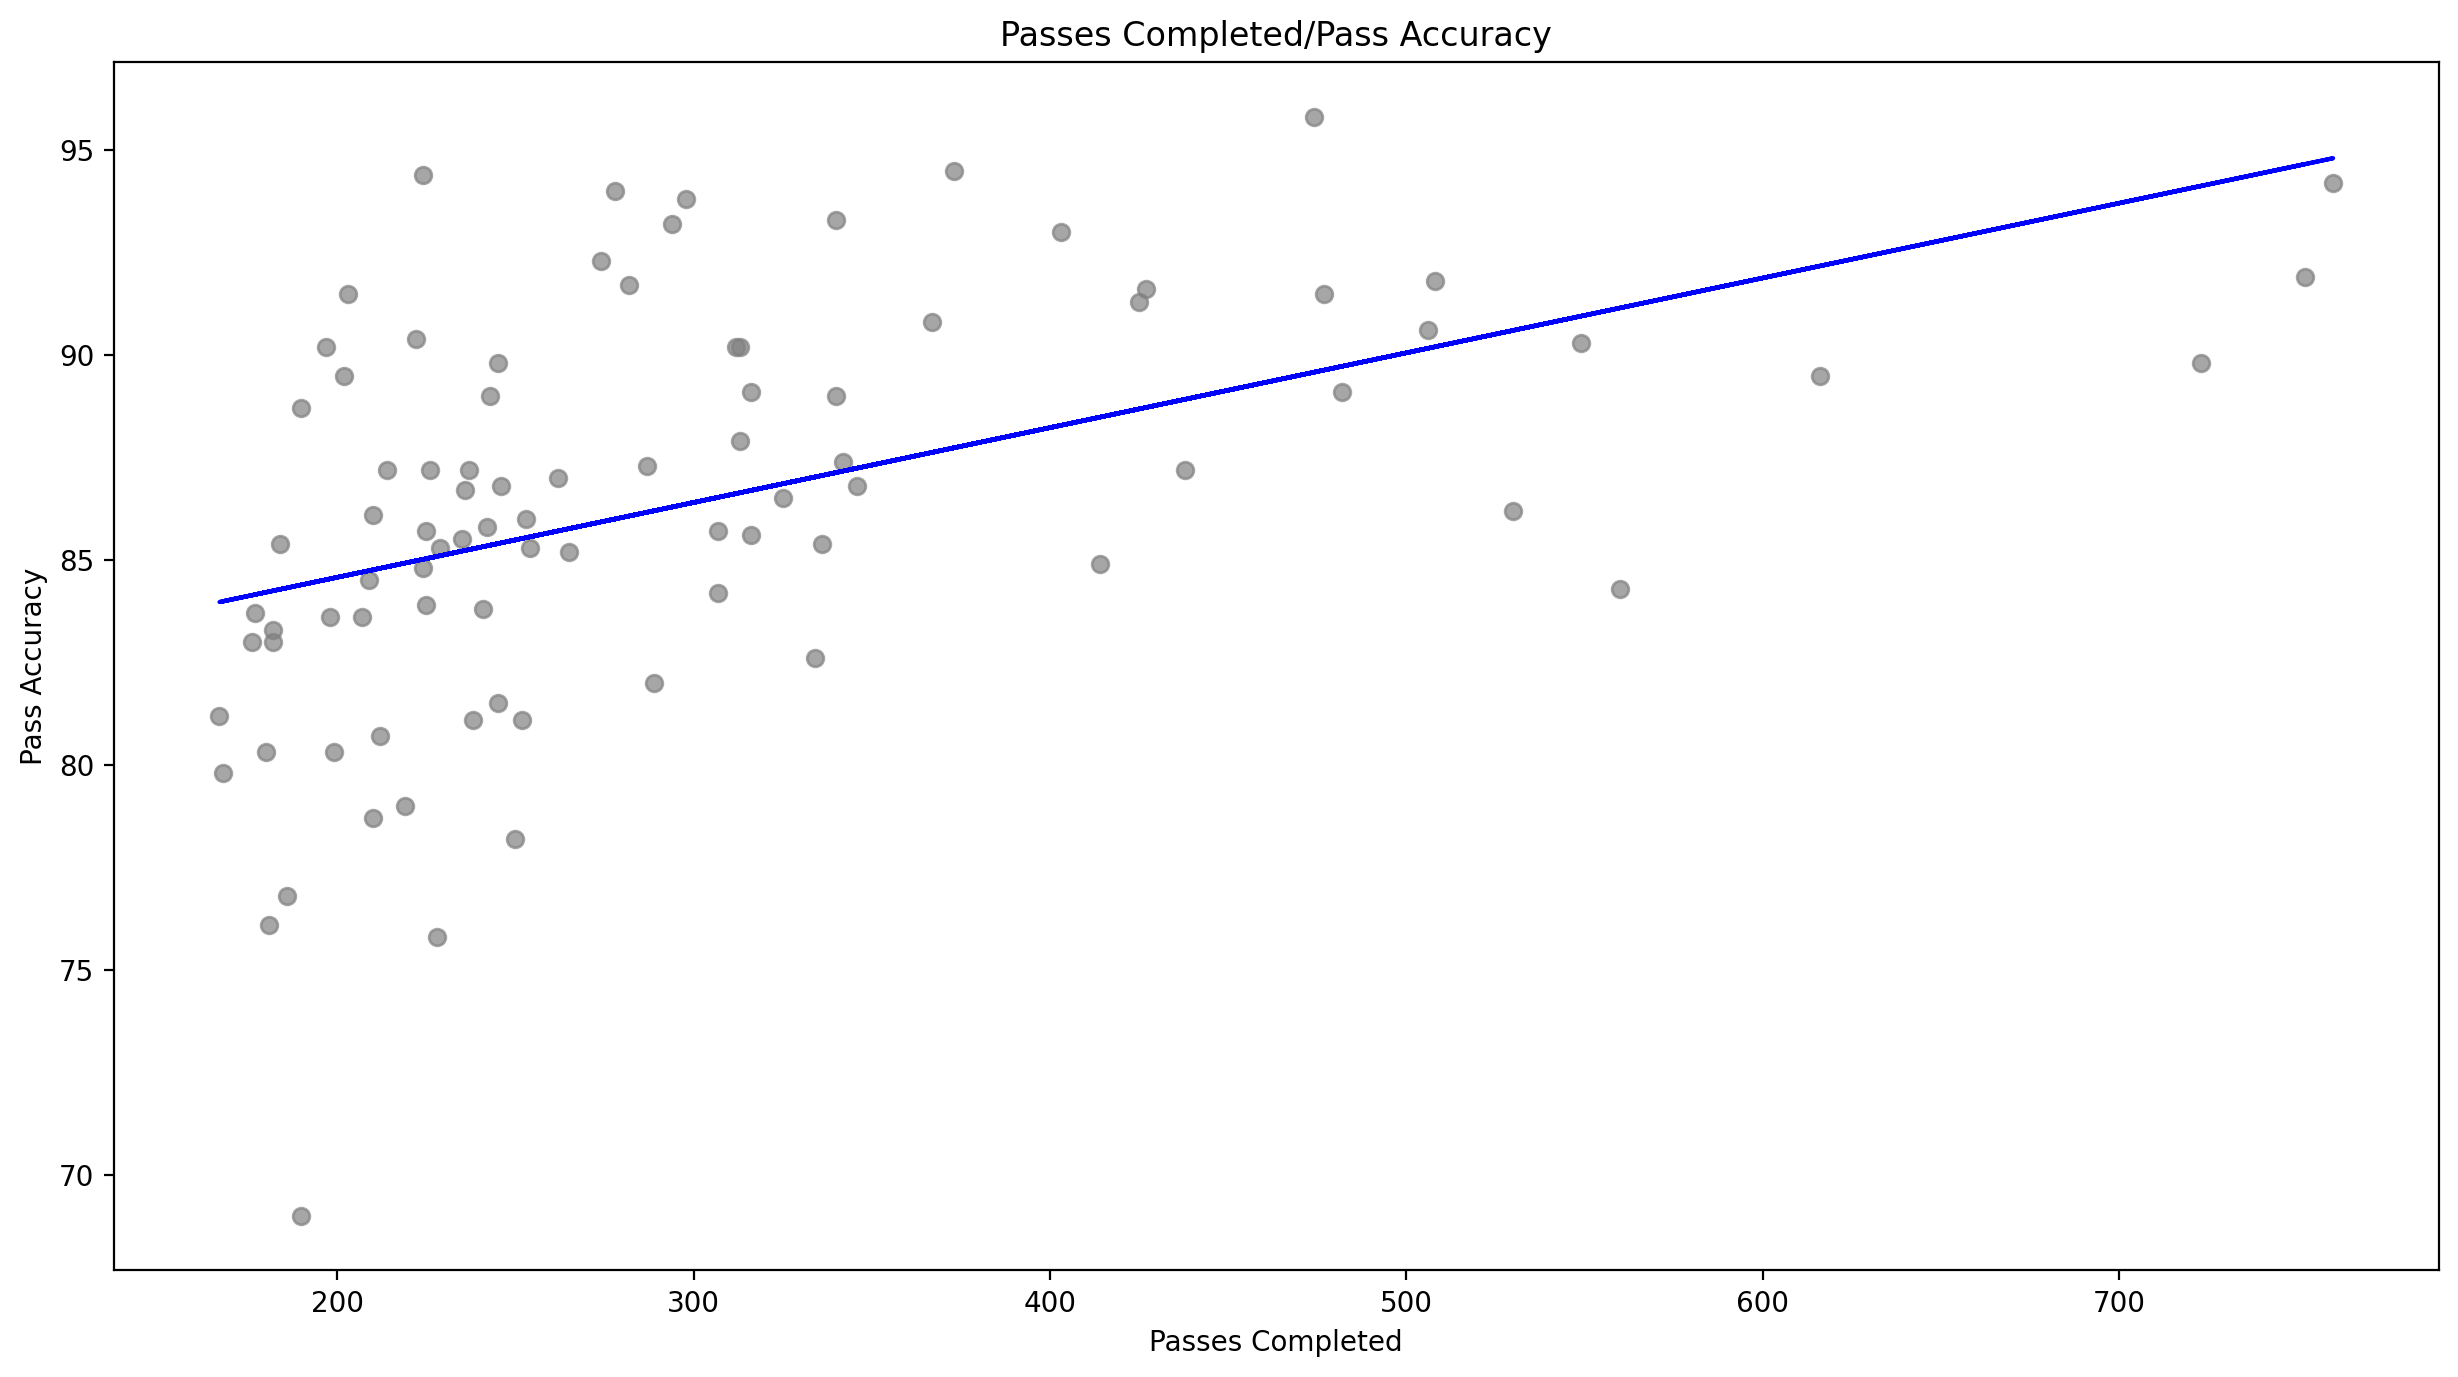

In [33]:
plt.figure(figsize = (15,8), dpi = 200)
plt.scatter(midfielders_df['pass_completed'],midfielders_df['pass_accuracy'], alpha = 0.7, c = 'grey')
plt.xlabel("Passes Completed")
plt.ylabel("Pass Accuracy")
plt.title("Passes Completed/Pass Accuracy")
q = np.polyfit(midfielders_df['pass_completed'], midfielders_df['pass_accuracy'], 1)
p = np.poly1d(q)
plt.plot(midfielders_df['pass_completed'],p(midfielders_df['pass_completed']),"b")

In [34]:
mid_stats = stats[(stats['assists'] > 0) & (stats['position'] == 'Midfielder')]
mid_stats.head()
mid_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 3 to 683
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   player_name       78 non-null     object 
 1   club              78 non-null     object 
 2   position          78 non-null     object 
 3   minutes_played    78 non-null     int64  
 4   match_played      78 non-null     int64  
 5   goals             78 non-null     int64  
 6   assists           78 non-null     int64  
 7   distance_covered  78 non-null     object 
 8   output            78 non-null     float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.1+ KB


In [35]:
#xA per minutes for Midfielders
mid_stats20 = mid_stats[(mid_stats['match_played'] > 4)]
mid_stats['assists_per_90'] =(mid_stats['assists'] / mid_stats['minutes_played'])*90
mid_stats = mid_stats.sort_values('assists_per_90', ascending = False)
mid_stats.head()

<ipython-input-35-6c2935cf5b23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mid_stats['assists_per_90'] =(mid_stats['assists'] / mid_stats['minutes_played'])*90


,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,output,assists_per_90
683,Novoa,Leipzig,Midfielder,24,1,0,1,3.6,1.0,3.750000
196,Bruno Fernandes,Man. United,Midfielder,520,7,0,7,58.4,1.0,1.211538
621,Fábio Vieira,Porto,Midfielder,85,2,0,1,11,0.5,1.058824
46,Jones,Liverpool,Midfielder,185,4,0,2,27.1,0.5,0.972973
479,Dahoud,Dortmund,Midfielder,212,4,0,2,28.2,0.5,0.849057


In [38]:
#xA plotting
midfielders_df['xA'] = ((midfielders_df['pass_accuracy'] + midfielders_df['cross_accuracy'])/200)
midfielders_df.head(6)

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played,xA
535,536,Seiwald,Salzburg,Midfielder,69.0,258,190,20,25,5,9,8,0.4450
460,461,De Paul,Atlético,Midfielder,75.8,293,228,29,17,5,19,9,0.5240
455,456,Aaronson,Salzburg,Midfielder,76.1,239,181,27,18,5,4,8,0.5155
445,446,Ziyech,Chelsea,Midfielder,76.8,240,186,26,41,11,3,9,0.5140
424,425,Bruno Fernandes,Man. United,Midfielder,78.2,324,250,21,28,6,11,7,0.4960
412,413,Arnold,Wolfsburg,Midfielder,78.7,266,210,38,18,7,25,6,0.5835


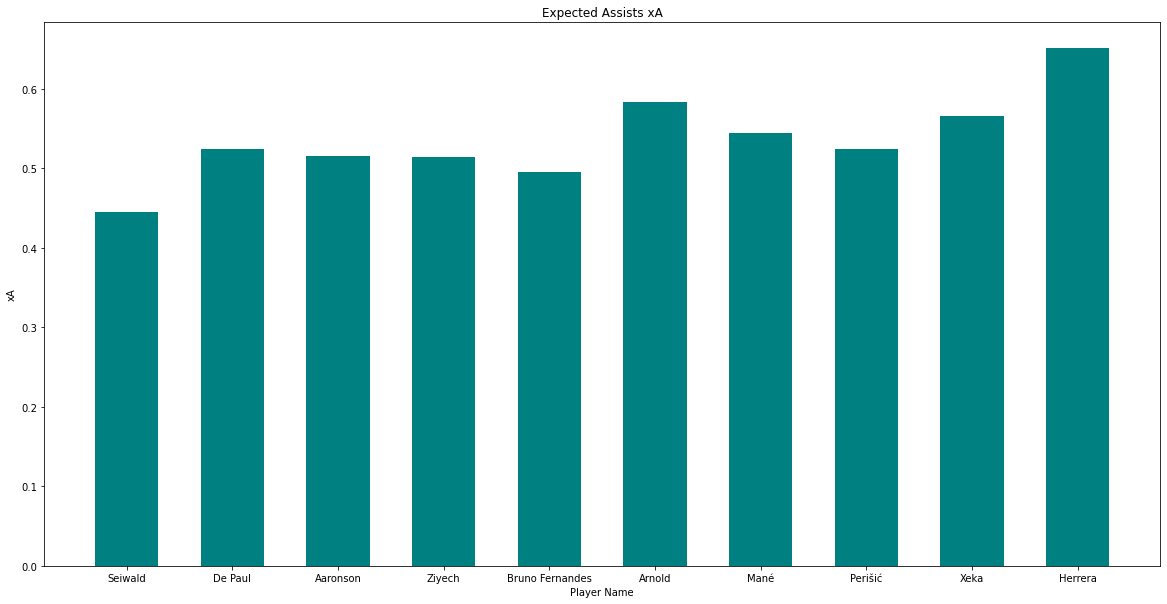

In [39]:
xa = midfielders_df[midfielders_df['match_played'] > 4]
plt.figure(figsize = (20,10))
plt.bar(xa['player_name'].head(10), xa['xA'].head(10), color = 'teal', width = 0.6)
plt.title('Expected Assists xA')
plt.xlabel('Player Name')
plt.ylabel('xA')
plt.show()

### Defenders

In [40]:
defending.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12


In [41]:
discp.head()

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5


In [42]:
pd.to_numeric(discp['match_played'])

0       6
1      12
2      10
3       8
4       5
       ..
579     2
580     1
581     1
582     1
583     1
Name: match_played, Length: 584, dtype: int64

In [43]:
discp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   serial           584 non-null    int64 
 1   player_name      584 non-null    object
 2   club             584 non-null    object
 3   position         584 non-null    object
 4   fouls_committed  584 non-null    int64 
 5   fouls_suffered   584 non-null    int64 
 6   red              584 non-null    int64 
 7   yellow           584 non-null    int64 
 8   minutes_played   584 non-null    int64 
 9   match_played     584 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 45.8+ KB


In [44]:
def_discp = discp[(discp['position'] == 'Defender') & (discp['match_played'] > 5)]
def_discp = def_discp.sort_values('fouls_committed', ascending = False)
defdiscp15 = def_discp.head(15)
defdiscp15

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
6,6,Éder Militão,Real Madrid,Defender,17,16,4,0,1076,12
7,6,Otamendi,Benfica,Defender,17,11,2,0,810,9
12,12,Gilberto,Benfica,Defender,16,13,1,0,715,9
15,16,Reinildo,Atlético,Defender,15,15,2,0,816,10
18,16,Carvajal,Real Madrid,Defender,15,6,3,0,959,11
22,20,Renan Lodi,Atlético,Defender,14,6,0,0,478,10
24,20,Kristensen,Salzburg,Defender,14,4,1,0,720,8
29,26,Ulmer,Salzburg,Defender,13,2,2,0,716,8
33,31,Dumfries,Inter,Defender,12,7,1,0,467,7
49,40,João Cancelo,Man. City,Defender,11,4,3,0,840,9


In [45]:
defending['clearances_per_90'] = defending['clearance_attempted'] / defending['match_played']
defending['tackle_pct'] = (defending['t_won'] * 100) / defending['tackles']
defending.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played,clearances_per_90,tackle_pct
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11,1.727273,41.935484
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12,2.666667,31.578947
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10,2.000000,46.153846
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13,0.615385,39.130435
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12,5.166667,66.666667


In [46]:
avg_tackles = defending['tackles'].mean()
print('Avg tackles:', avg_tackles)

Avg tackles: 4.732057416267943


In [47]:
defending = defending[(defending['tackles'] > avg_tackles) & (defending['position'] == 'Defender')].reset_index(drop=True)
defending.head()

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played,clearances_per_90,tackle_pct
0,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12,2.666667,31.578947
1,1,Reinildo,Atlético,Defender,76,13,6,7,20,10,2.000000,46.153846
2,5,Albiol,Villarreal,Defender,73,9,6,3,62,12,5.166667,66.666667
3,6,Thiago Silva,Chelsea,Defender,65,9,4,5,17,9,1.888889,44.444444
4,7,Otamendi,Benfica,Defender,63,28,17,11,48,9,5.333333,60.714286


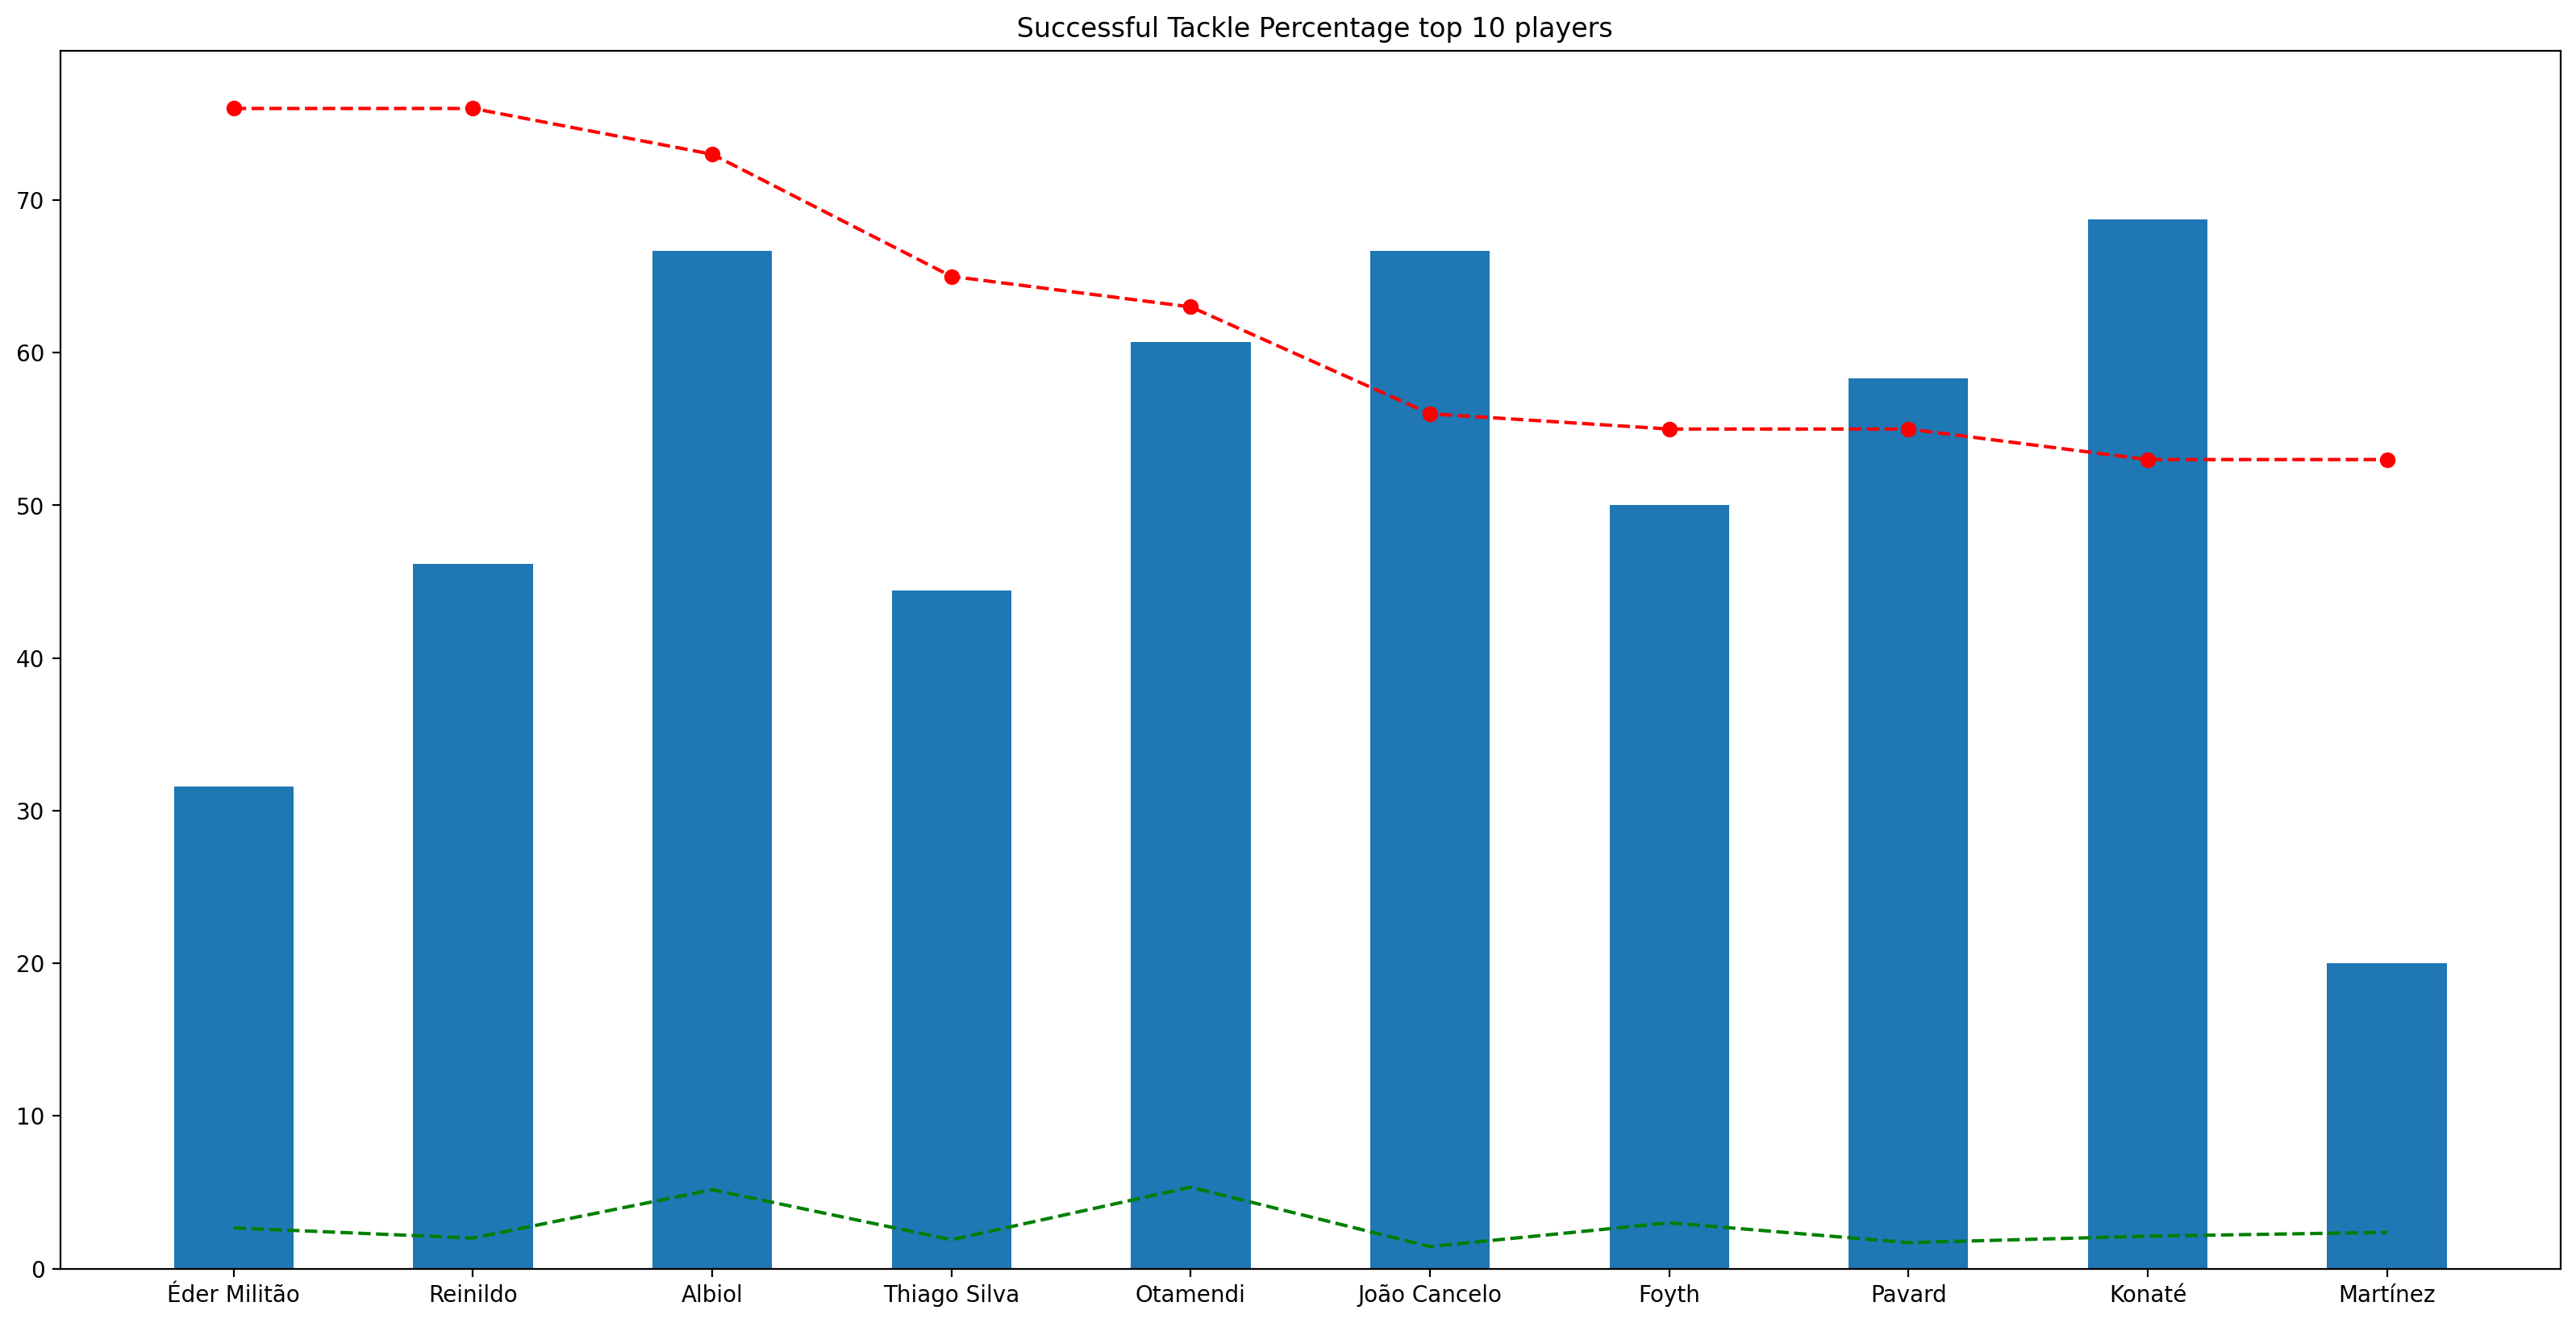

In [48]:
plt.figure(figsize = (20,10), dpi = 200)
plt.bar(defending['player_name'].head(10),defending['tackle_pct'].head(10), width = 0.5)
plt.plot(defending['clearances_per_90'].head(10), 'g--')
plt.plot(defending['balls_recoverd'].head(10), 'ro--')
plt.title(' Successful Tackle Percentage top 10 players')
plt.show()

<BarContainer object of 15 artists>

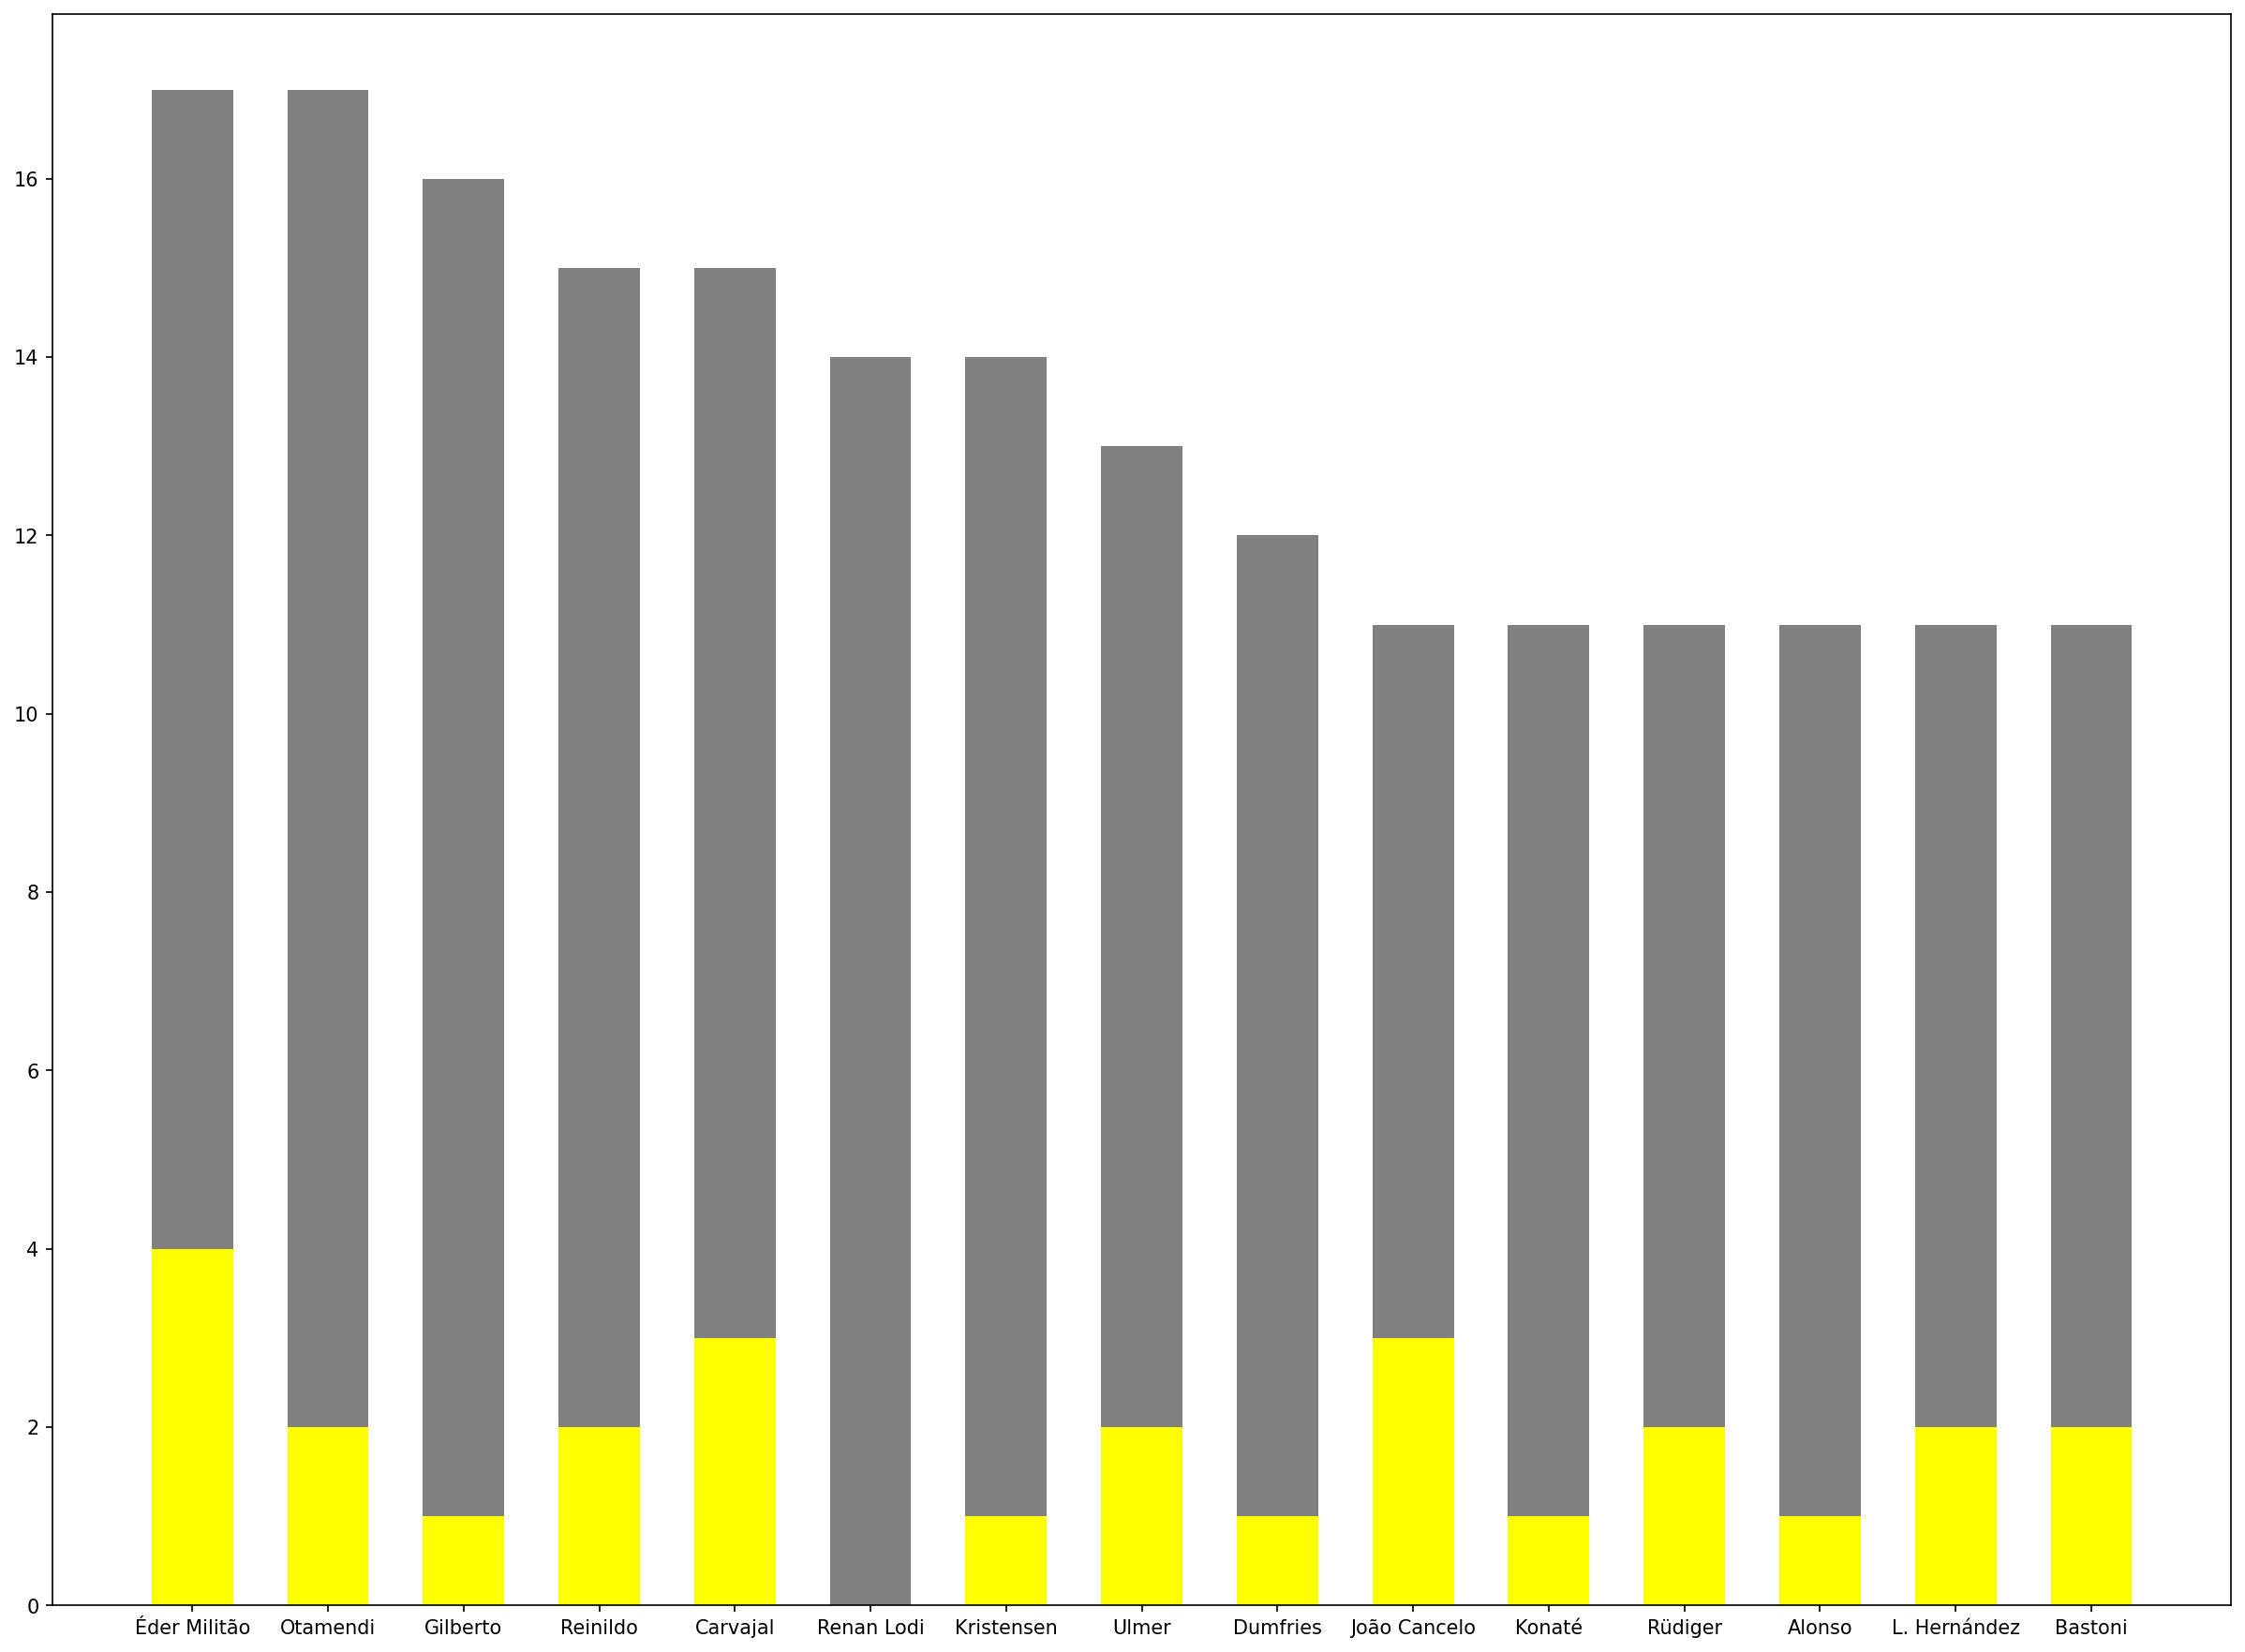

In [49]:
plt.figure(figsize = (20,15), dpi = 150)
plt.bar(defdiscp15['player_name'], defdiscp15['fouls_committed'],color = 'grey', width = 0.6)
plt.bar(defdiscp15['player_name'], defdiscp15['red'],color = 'yellow', width = 0.6)
#Militao and Otamendi make the most fouls, while Militao, Carvajal and Cancelo are the most cautioned players

## Goalkeepers

In [50]:
gk.head(10)

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6
5,6,Oblak,Atlético,Goalkeeper,26,10,0,3,2,10
6,7,Musso,Atalanta,Goalkeeper,21,13,0,1,1,6
7,8,Ersin Destanoğlu,Beşiktaş,Goalkeeper,20,17,0,0,0,5
8,9,De Gea,Man. United,Goalkeeper,19,9,0,1,0,7
9,9,Dahlin,Malmö,Goalkeeper,19,8,1,0,3,4


In [51]:
gk_df = gk[(gk['match_played'] > 6)]
gk_df.head()

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
5,6,Oblak,Atlético,Goalkeeper,26,10,0,3,2,10
8,9,De Gea,Man. United,Goalkeeper,19,9,0,1,0,7


KeyError: 3

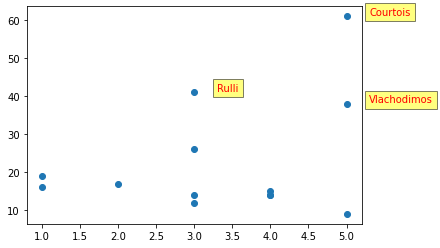

In [52]:
#plotting cleansheets against saves
plt.scatter(gk_df['cleansheets'],gk_df['saved']) 
for i in range(gk_df.shape[0]):
 plt.text(x=gk_df.cleansheets[i]+0.3,y= gk_df.saved[i]+0.3, s= gk_df.player_name[i], 
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

In [56]:
plt.figure( figsize = (20,10), dpi = 1000)
plt.bar(gk_df['player_name'], gk_df['saved'], color = 'green')
plt.show()

In [57]:
#Performance of the best keeper Thibaut Courtois
courtois = [1,4,56]
myexplode = [0.3,0.3,0]
labels = ['penalties saved', 'punches','parries']

Text(0.5, 1.0, 'Thibaut Courtois Saves Distribution')

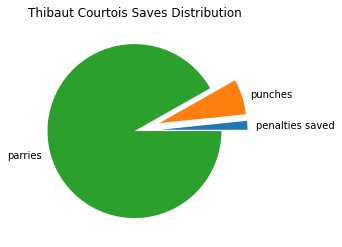

In [58]:
plt.pie(courtois , explode = myexplode, labels = labels)
plt.title('Thibaut Courtois Saves Distribution')